In [1]:
import pandas as pd


In [2]:
# Create sample employee salary data
data = {
    "experience": [2, 5, 7, 3, 10, 4, 8, 1, 6, 9],
    "education": ["Bachelor", "Master", "Bachelor", "Bachelor", "PhD", "Master", "PhD", "Bachelor", "Master", "PhD"],
    "job_title": ["Software Engineer", "Data Analyst", "Software Engineer", "Web Developer", "ML Engineer", "Data Analyst", "Data Scientist", "Intern", "Software Engineer", "ML Engineer"],
    "location": ["Hyderabad", "Bangalore", "Chennai", "Mumbai", "Bangalore", "Delhi", "Hyderabad", "Mumbai", "Chennai", "Bangalore"],
    "age": [24, 29, 31, 25, 35, 27, 33, 22, 30, 34],
    "salary": [32000, 50000, 62000, 38000, 85000, 46000, 92000, 25000, 67000, 88000]
}

df = pd.DataFrame(data)


In [3]:
# Save to CSV
df.to_csv("employee_salary.csv", index=False)


In [4]:
# Download in Colab
from google.colab import files
files.download("employee_salary.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving employee_salary.csv to employee_salary (1).csv


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load the uploaded file
df = pd.read_csv("employee_salary.csv")


In [8]:
# Encode categorical features
label_encoders = {}
for col in ['education', 'job_title', 'location']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders if you want to predict later


In [9]:
# Split features and target
X = df.drop("salary", axis=1)
y = df["salary"]



In [10]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Train KNN Regressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [13]:
# Predict
y_pred = model.predict(X_test)

In [14]:
# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 385111111.1111109
R² Score: -4.33025759323337


In [15]:
import matplotlib.pyplot as plt
import numpy as np

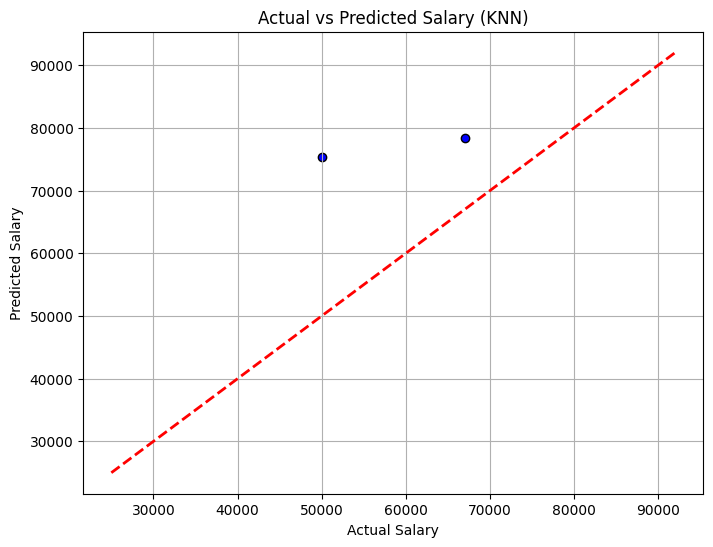

In [16]:
# Actual vs Predicted scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary (KNN)')
plt.grid(True)
plt.show()

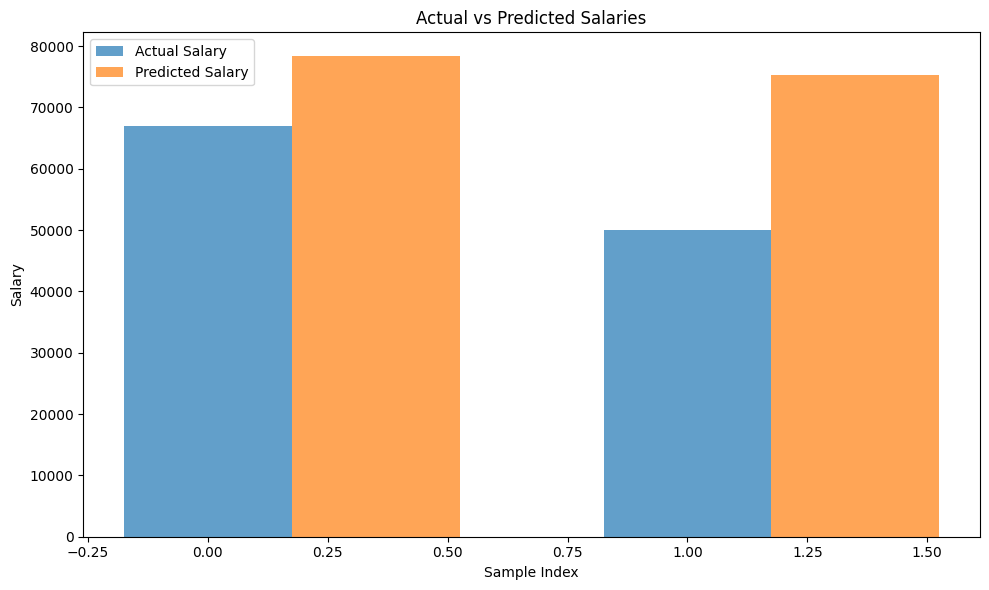

In [17]:
# Bar chart of predictions vs actual for a few samples
plt.figure(figsize=(10, 6))
indices = np.arange(len(y_test))
bar_width = 0.35

plt.bar(indices, y_test.values, bar_width, label='Actual Salary', alpha=0.7)
plt.bar(indices + bar_width, y_pred, bar_width, label='Predicted Salary', alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salaries')
plt.legend()
plt.tight_layout()
plt.show()
